In [10]:
import subprocess
import re

target_file = "./build/LinkedListProject.exe"

# Define m_fractions combinations and thread counts
m_fractions_list = [
    (0.99, 0.005, 0.005),
    (0.9, 0.05, 0.05),
    (0.5, 0.25, 0.25),
]

thread_counts = [1, 2, 4, 8]

# Initialize a dictionary to store results
results = {
    "Serial": {"avg": [], "std": []},
    "Mutex": {"avg": [], "std": []},
    "RWLock": {"avg": [], "std": []},
}

# Run for each combination of m_fractions and thread counts
for m_fractions in m_fractions_list:
    m_member, m_insert, m_delete = m_fractions

    # Create temporary lists to store the averages and std devs for each case
    serial_avg, mutex_avg, rwlock_avg = [], [], []
    serial_std, mutex_std, rwlock_std = [], [], []

    for threads in thread_counts:
        # Call the compiled program with the required arguments
        process = subprocess.Popen(
            [target_file, str(m_member), str(m_insert), str(m_delete), str(threads)],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
        )
        stdout, stderr = process.communicate()

        avg_times = []
        std_times = []

        # Extract times from the output
        for line in stdout.decode("utf-8").split("\n"):
            avg_pattern = r"Average time taken for .*?: ([\d.]+) seconds"
            std_pattern = r"Standard deviation for .*?: ([\d.]+) seconds"
            avg_match = re.match(avg_pattern, line)
            std_match = re.match(std_pattern, line)

            if avg_match:
                avg_times.append(float(avg_match.group(1)))
            if std_match:
                std_times.append(float(std_match.group(1)))

        # Append the results to the respective lists for each case
        if len(avg_times) == 3 and len(std_times) == 3:
            serial_avg.append(avg_times[0])
            mutex_avg.append(avg_times[1])
            rwlock_avg.append(avg_times[2])

            serial_std.append(std_times[0])
            mutex_std.append(std_times[1])
            rwlock_std.append(std_times[2])

    # Append the results for the current case (m_fractions)
    results["Serial"]["avg"].append(serial_avg)
    results["Serial"]["std"].append(serial_std)

    results["Mutex"]["avg"].append(mutex_avg)
    results["Mutex"]["std"].append(mutex_std)

    results["RWLock"]["avg"].append(rwlock_avg)
    results["RWLock"]["std"].append(rwlock_std)

# Print the results in the desired tabular format
def print_results(label, data):
    print(f"{label}\t1\t\t2\t\t4\t\t8")
    for i, case in enumerate(data["avg"]):
        print(f"case{i+1}\t", end="")
        for j in range(len(thread_counts)):
            print(f"{case[j]:.6f} {data['std'][i][j]:.6f}\t", end="")
        print()

print("Cases: case1 = 0.99, case2 = 0.9, case3 = 0.5\n")
print("Implementation\tNo of threads")
print_results("Serial", results["Serial"])
print_results("Mutex", results["Mutex"])
print_results("RWLock", results["RWLock"])


Cases: case1 = 0.99, case2 = 0.9, case3 = 0.5

Implementation	No of threads
Serial	1		2		4		8
case1	0.026891 0.000674	0.027965 0.002244	0.027084 0.001314	0.027682 0.001702	
case2	0.032896 0.001279	0.030587 0.000735	0.031875 0.001319	0.032748 0.002827	
case3	0.048998 0.001862	0.049129 0.001866	0.048445 0.001468	0.048633 0.001992	
Mutex	1		2		4		8
case1	0.038629 0.000471	0.085921 0.004353	0.093473 0.003005	0.099587 0.001723	
case2	0.044152 0.000597	0.094279 0.004393	0.100406 0.003018	0.105592 0.002301	
case3	0.074537 0.004626	0.116943 0.008307	0.121714 0.006410	0.125473 0.005535	
RWLock	1		2		4		8
case1	0.035820 0.000289	0.042768 0.000822	0.045519 0.000704	0.050789 0.000912	
case2	0.041248 0.000393	0.061061 0.000929	0.072279 0.001280	0.078852 0.001395	
case3	0.082007 0.002178	0.134450 0.002471	0.154405 0.002356	0.171829 0.001680	


In [11]:
import csv

# Function to save the results into a CSV file
def save_results_to_csv(filename, results, thread_counts):
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)

        # Write header
        writer.writerow(["Implementation", "Case", "Metric"] + [f"{threads} Threads" for threads in thread_counts])

        # Write rows for Serial
        for metric in ["avg", "std"]:
            for i, case in enumerate(results["Serial"][metric]):
                row = ["Serial", f"case{i+1}", metric.capitalize()]
                row += [f"{results['Serial'][metric][i][j]:.6f}" for j in range(len(thread_counts))]
                writer.writerow(row)

        # Write rows for Mutex
        for metric in ["avg", "std"]:
            for i, case in enumerate(results["Mutex"][metric]):
                row = ["Mutex", f"case{i+1}", metric.capitalize()]
                row += [f"{results['Mutex'][metric][i][j]:.6f}" for j in range(len(thread_counts))]
                writer.writerow(row)

        # Write rows for RWLock
        for metric in ["avg", "std"]:
            for i, case in enumerate(results["RWLock"][metric]):
                row = ["RWLock", f"case{i+1}", metric.capitalize()]
                row += [f"{results['RWLock'][metric][i][j]:.6f}" for j in range(len(thread_counts))]
                writer.writerow(row)

# Save the results to a CSV file
save_results_to_csv("operation_times_results.csv", results, thread_counts)


In [15]:
import csv

# Function to load the results from a CSV file
def load_results_from_csv(filename):
    results = {
        "Serial": {"avg": [], "std": []},
        "Mutex": {"avg": [], "std": []},
        "RWLock": {"avg": [], "std": []},
    }

    with open(filename, mode="r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row

        for row in reader:
            # row[0] is the operation (Serial, Mutex, RWLock)
            operation = row[0]
            # row[2] is the metric (Average or Std)
            metric = row[2].lower()

            # Convert the remaining columns to floats (times for each thread count)
            times = [float(x) for x in row[3:]]

            if operation in results:
                if metric == "avg":
                    results[operation]["avg"].append(times)
                elif metric == "std":
                    results[operation]["std"].append(times)

    return results

# Load the results from the CSV file
loaded_results = load_results_from_csv("operation_times_results.csv")

# Print the loaded results for verification
import pprint
pprint.pprint(loaded_results)


{'Mutex': {'avg': [[0.038629, 0.085921, 0.093473, 0.099587],
                   [0.044152, 0.094279, 0.100406, 0.105592],
                   [0.074537, 0.116943, 0.121714, 0.125473]],
           'std': [[0.000471, 0.004353, 0.003005, 0.001723],
                   [0.000597, 0.004393, 0.003018, 0.002301],
                   [0.004626, 0.008307, 0.00641, 0.005535]]},
 'RWLock': {'avg': [[0.03582, 0.042768, 0.045519, 0.050789],
                    [0.041248, 0.061061, 0.072279, 0.078852],
                    [0.082007, 0.13445, 0.154405, 0.171829]],
            'std': [[0.000289, 0.000822, 0.000704, 0.000912],
                    [0.000393, 0.000929, 0.00128, 0.001395],
                    [0.002178, 0.002471, 0.002356, 0.00168]]},
 'Serial': {'avg': [[0.026891, 0.027965, 0.027084, 0.027682],
                    [0.032896, 0.030587, 0.031875, 0.032748],
                    [0.048998, 0.049129, 0.048445, 0.048633]],
            'std': [[0.000674, 0.002244, 0.001314, 0.001702],
            

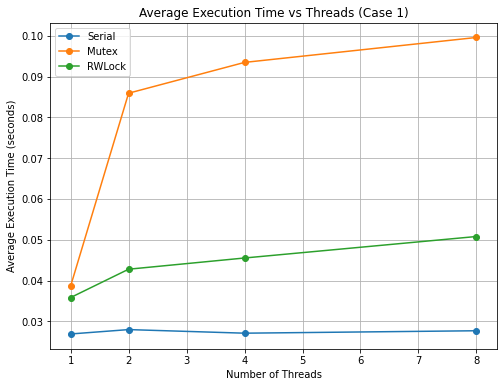

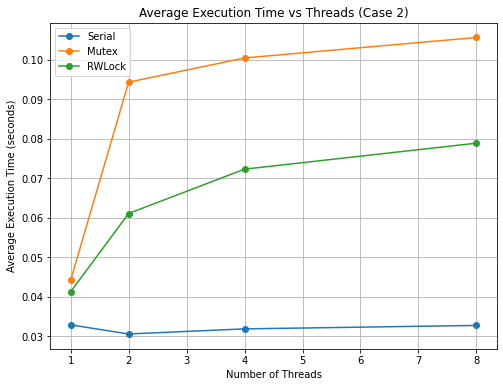

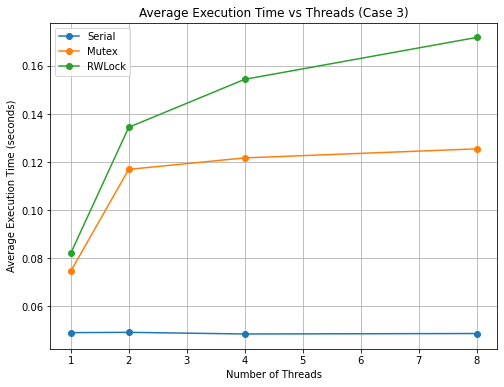

In [16]:
import matplotlib.pyplot as plt

# Create a function to plot for each case
def plot_average_execution_time(loaded_results, thread_counts, case_index):
    plt.figure(figsize=(8, 6))

    # Extract the average times for the current case
    serial_avg = loaded_results['Serial']['avg'][case_index]
    mutex_avg = loaded_results['Mutex']['avg'][case_index]
    rwlock_avg = loaded_results['RWLock']['avg'][case_index]

    # Plot Serial, Mutex, and RWLock averages against number of threads
    plt.plot(thread_counts, serial_avg, label="Serial", marker='o')
    plt.plot(thread_counts, mutex_avg, label="Mutex", marker='o')
    plt.plot(thread_counts, rwlock_avg, label="RWLock", marker='o')

    # Add labels, title, and legend
    plt.xlabel("Number of Threads")
    plt.ylabel("Average Execution Time (seconds)")
    plt.title(f"Average Execution Time vs Threads (Case {case_index + 1})")
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Plot for all three cases
for case_index in range(3):
    plot_average_execution_time(loaded_results, thread_counts, case_index)



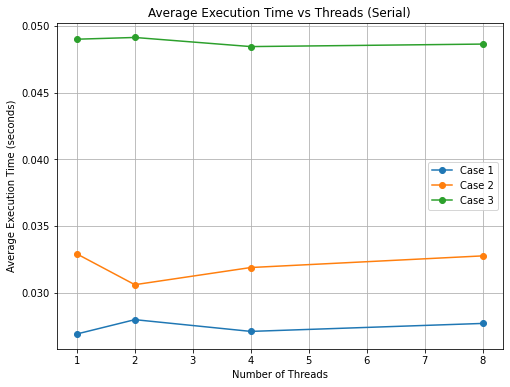

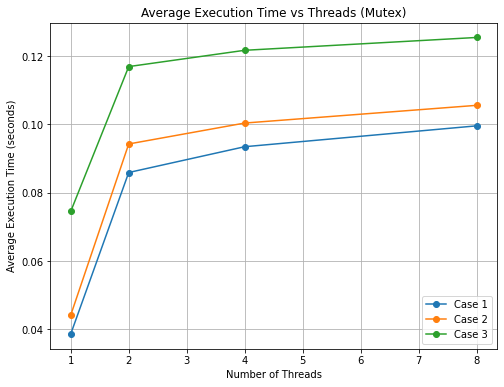

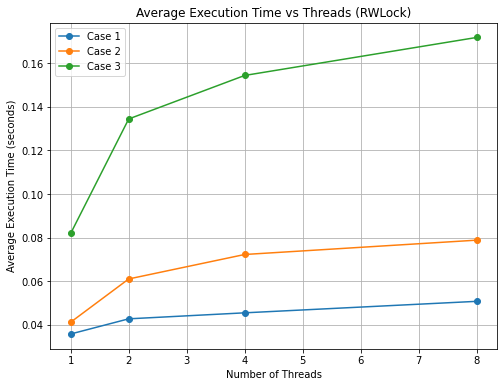

In [17]:
import matplotlib.pyplot as plt

# Create a function to plot for each method
def plot_method_execution_time(loaded_results, thread_counts, method):
    plt.figure(figsize=(8, 6))

    # Extract the average times for each case for the given method
    case1_avg = loaded_results[method]['avg'][0]
    case2_avg = loaded_results[method]['avg'][1]
    case3_avg = loaded_results[method]['avg'][2]

    # Plot case1, case2, and case3 averages against number of threads
    plt.plot(thread_counts, case1_avg, label="Case 1", marker='o')
    plt.plot(thread_counts, case2_avg, label="Case 2", marker='o')
    plt.plot(thread_counts, case3_avg, label="Case 3", marker='o')

    # Add labels, title, and legend
    plt.xlabel("Number of Threads")
    plt.ylabel("Average Execution Time (seconds)")
    plt.title(f"Average Execution Time vs Threads ({method})")
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

# Plot for each method (Serial, Mutex, RWLock)
methods = ["Serial", "Mutex", "RWLock"]
for method in methods:
    plot_method_execution_time(loaded_results, thread_counts, method)
